In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
data_folder = 'C:/Users/aline/Downloads/projet_ADA/'
df = pd.read_csv(data_folder + 'df_movies_merged.csv')

In [3]:
file_path = 'C:/Users/aline/Downloads/projet_ADA/df_movies_merged.csv'
df = pd.read_csv(file_path)
df.head(5)

,Movie name,Release Date,Movie box office revenue,Movie runtime,Main genre,Main language,Main country,Plot summary,tconst,averageRating,numVotes,Movie languages,Movie countries,Movie genres
0,Ghosts of Mars,2001.0,14010832.0,98.0,Thriller,English Language,United States of America,"Set in the second half of the 22nd century, th...",tt0228333,4.9,56894.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,White Of The Eye,1987.0,NaN,110.0,Thriller,English Language,United Kingdom,A series of murders of rich young women throug...,tt0094320,6.1,2894.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
2,A Woman in Flames,1983.0,NaN,106.0,Drama,German Language,Germany,"Eva, an upper class housewife, becomes frustra...",tt0083949,5.9,623.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
3,The Sorcerer's Apprentice,2002.0,NaN,86.0,Family Film,English Language,South Africa,"Every hundred years, the evil Morgana returns...",NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
4,Little city,1997.0,NaN,93.0,Romantic comedy,English Language,United States of America,"Adam, a San Francisco-based artist who works a...",tt0119548,5.8,1129.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ..."


In [9]:
df.columns
#matrix correlation between genre and revenue
df_genre = df[['Main genre', 'Movie box office revenue']]
df_genre = df_genre.dropna()
df_genre


,Main genre,Movie box office revenue
0,Thriller,14010832.0
5,Costume drama,10161099.0
8,Children's/Family,102272727.0
12,Crime Fiction,29381649.0
22,Adventure,34331783.0
...,...,...
42703,Romantic comedy,288752301.0
42712,Alien Film,15369573.0
42715,Parody,6944471.0
42716,Thriller,22886222.0


In [12]:
# Count the occurrences of each genre
genre_counts = df['Main genre'].value_counts()

# Get the top 10 genres
top_10_genres = genre_counts.head(10).index

filtered_df = df[df['Main genre'].isin(top_10_genres)]


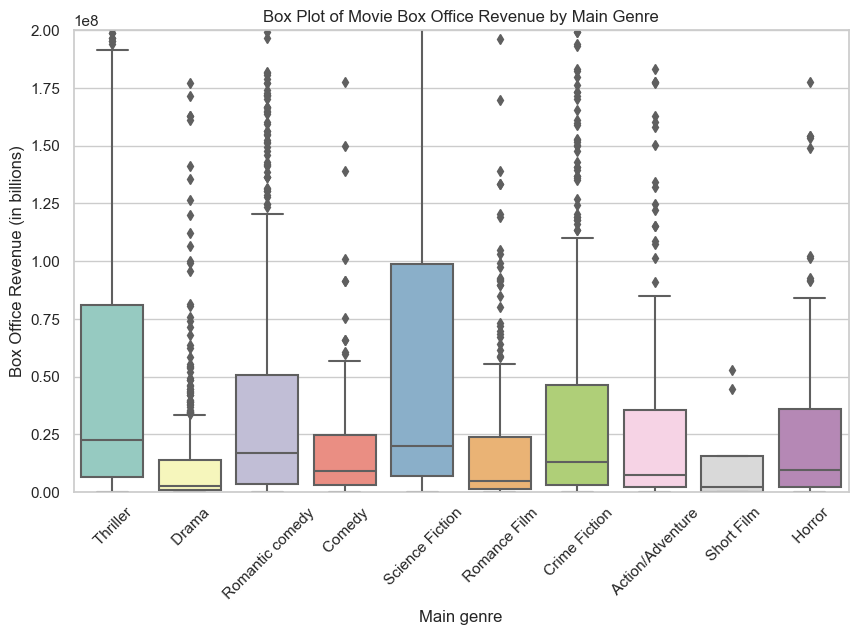

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Main genre", y="Movie box office revenue", data=filtered_df, palette="Set3")
plt.xticks(rotation=45)
plt.ylim(0, 2e8)  
plt.title("Box Plot of Movie Box Office Revenue by Main Genre")
plt.ylabel("Box Office Revenue (in billions)")
plt.show()





In [30]:
df_rating = df[['averageRating', 'Movie box office revenue']]
df_rating = df_rating.dropna()
df_rating

,averageRating,Movie box office revenue
0,4.9,14010832.0
5,7.5,10161099.0
8,7.8,102272727.0
12,6.4,29381649.0
22,7.3,34331783.0
...,...,...
42702,6.9,2158775.0
42703,7.1,288752301.0
42712,5.3,15369573.0
42715,6.7,6944471.0


In [31]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

def calculate_correlations(df, col1, col2):
    pearson_corr, p_value_pearson = pearsonr(df[col1], df[col2])
    spearman_corr, p_value_spearman = spearmanr(df[col1], df[col2])
    
    return {
        'Pearson Correlation Coefficient': pearson_corr,
        'Pearson p-value': p_value_pearson,
        'Spearman Correlation Coefficient': spearman_corr,
        'Spearman p-value': p_value_spearman
    }

def correlation_matrix(df):
    return df.corr(method='pearson')

calculate_correlations(df_rating, 'averageRating', 'Movie box office revenue')
correlation_matrix(df_rating)


,averageRating,Movie box office revenue
averageRating,1.000000,0.165222
Movie box office revenue,0.165222,1.000000
